<a href="https://colab.research.google.com/github/ramonfsk/machineLearning/blob/master/regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
uri = 'https://raw.githubusercontent.com/ramonfsk/machineLearning/master/reg-linear/Dados/Consumo_cerveja.csv'
dados = pd.read_csv(uri, sep=';')

dados.shape

(365, 7)

In [11]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [13]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


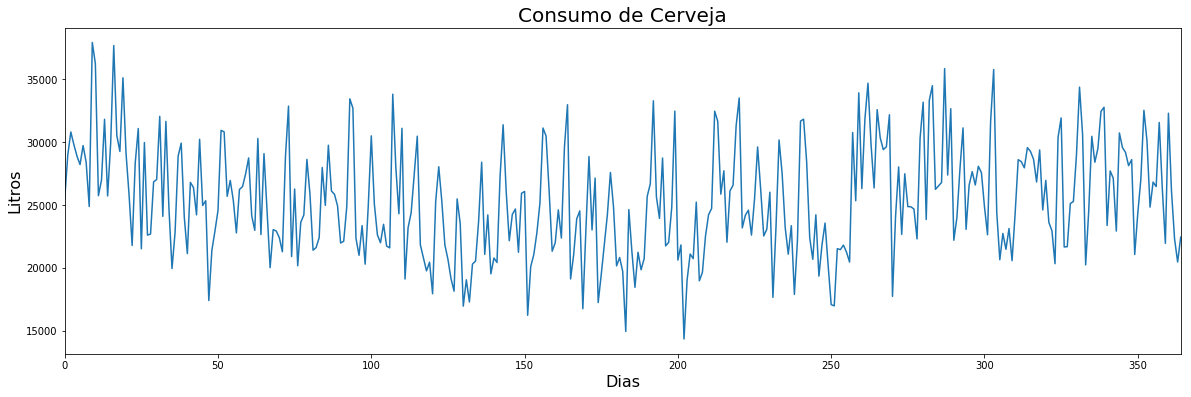

In [31]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados.consumo.plot()

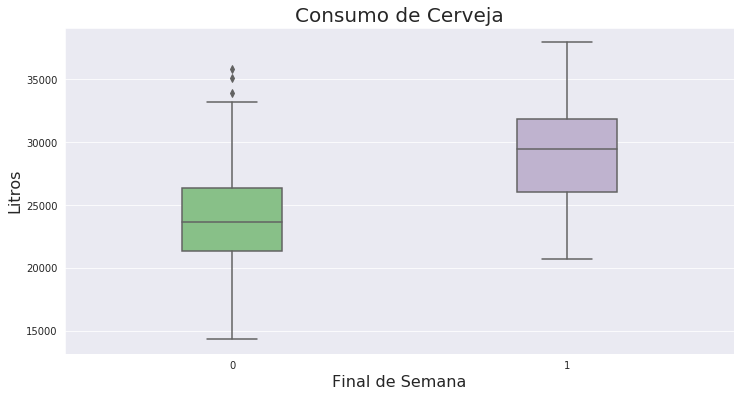

In [37]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
#ax = sns.boxplot(data=dados.consumo, orient='v', width=0.3)
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.3)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

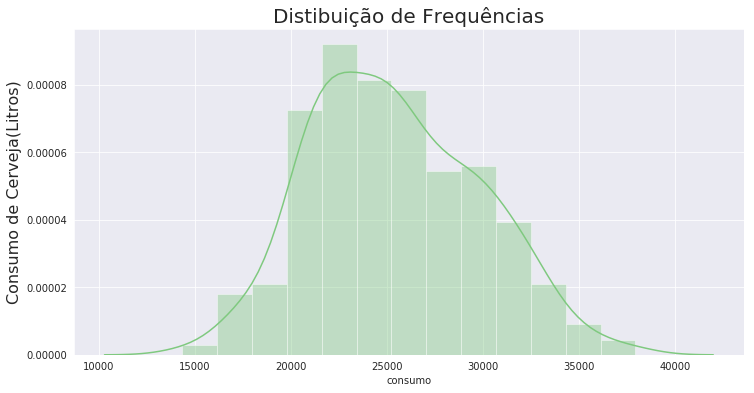

In [39]:
ax = sns.distplot(dados.consumo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distibuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

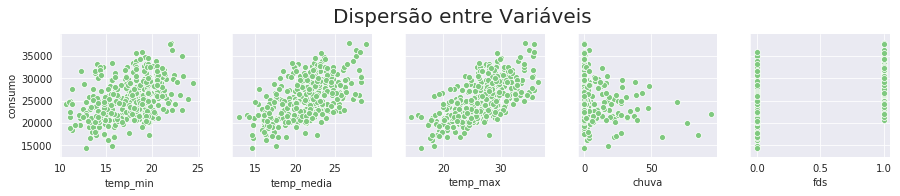

In [46]:
#ax = sns.pairplot(dados)
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.07)
ax

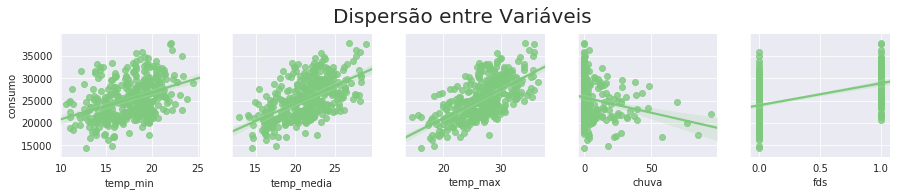

In [47]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.07)
ax

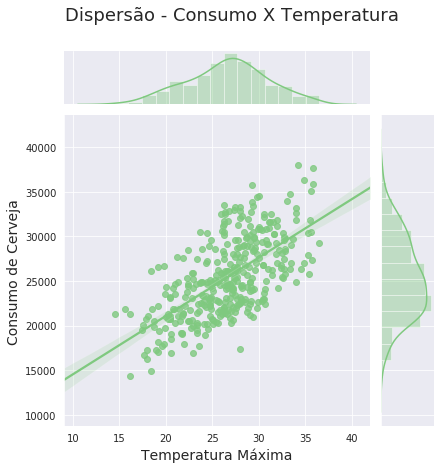

In [50]:
ax =sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.07)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

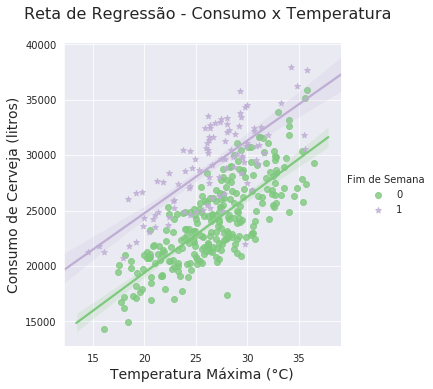

In [61]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16, y=1.06)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

In [0]:
from sklearn.model_selection import train_test_split

y = dados['consumo']
x = dados[['temp_max', 'chuva', 'fds']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2811)

In [73]:
x_train.shape

(244, 3)

In [75]:
x_test.shape

(121, 3)

In [77]:
x_train.shape[0] + x_test.shape[0]

365

In [79]:
x.shape[0] * 3

1095

In [81]:
x.shape[0] * 0.7

255.49999999999997